# Block 36: Workshop
## Social Media Cyber Attacks Analysis using Deep Learning

## Scenario 

The rise of social media platforms in the USA has transformed the way people communicate and share information. With its increasing popularity, these platforms have also become prime targets for cyber-attacks, which can range from data breaches to spreading misinformation. It is essential for companies and individuals to understand the patterns of these attacks to prevent potential threats in the future. 

## Objective 

To develop a deep learning model using TensorFlow and Keras that can predict the likelihood of a social media account or post being a target of a cyber-attack based on various input features. 

## Goals 

1. Data Preprocessing: 
- Handle missing values. 
- Convert text data into numerical data using techniques like TF-IDF or word embeddings. 
- Normalize and scale the features. 
2. Model Building: 
- Use TensorFlow and Keras to construct a deep learning model. 
- The model may consist of dense layers, dropout for regularization, and other components as deemed necessary. 
 
3. Training and Evaluation: 
- Split the data into training, validation, and test sets. 
- Train the model on the training data and validate its performance on the validation set. 
- Evaluate the final model performance on the test set using appropriate metrics (e.g., accuracy, precision, recall, F1-score). 
4. Forward Propagation: 
- Once the model is trained, use it to predict the likelihood of cyber-attacks on new, unseen data by applying forward propagation. 
- Ensure that the input data is preprocessed in the same way as the training data before making predictions. 
5. Report and Analysis: 
- Provide insights into which features are the most significant indicators of a potential cyber-attack. 
- Offer recommendations for social media users and platforms to enhance their security measures. 

### 1. Data Loading & Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import necessary functions/classes from scikit-learn library
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Import specific preprocessing tools from scikit-learn.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split  # Import a function for splitting data into training and testing sets.

# Import TensorFlow and Keras
# Import TensorFlow, a popular deep learning framework.
import tensorflow as tf
from tensorflow import keras  # Import Keras, the high-level neural networks API that runs on top of TensorFlow.

# Load the dataset
data = pd.read_csv('social_media_cyber_attack_dataset.csv')
# Read the CSV file 'social_media_cyber_attack_dataset.csv' as data.
# Display the first few rows of the DataFrame to inspect the data.
data.head()

2024-10-12 16:30:56.587489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-12 16:30:56.690537: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-10-12 16:30:58.300218: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


,post_content,time_of_post,followers,num_posts,account_type,likes,shares,comments,account_age,past_history,platform,cyber_attack
0,Sample post content 0,2022-10-16 06:55:48,7065,79,government,22,0,56,2253,0,Instagram,0
1,Sample post content 1,2023-07-13 06:55:48,1980,446,business,134,67,147,1327,0,Facebook,1
2,Sample post content 2,2023-08-27 06:55:48,9022,47,personal,225,94,32,3142,0,Twitter,0
3,Sample post content 3,2023-04-21 06:55:48,3783,241,business,238,6,13,26,1,Twitter,1
4,Sample post content 4,2023-05-06 06:55:48,2541,98,business,134,70,134,467,0,Instagram,0


### 2. Data Preprocessing
- TF-IDF, which stands for Term Frequency-Inverse Document Frequency, is a numerical technique used in natural language processing (NLP) to convert text data into numerical form. 
- It is particularly useful for representing the importance of words in a document within a larger corpus of documents.
- TfidfVectorizer to create a TF-IDF representation of text data with a maximum of 100 features (terms) to capture the most significant information from the documents.


In [2]:
# Import the TfidfVectorizer from scikit-learn for text data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with a maximum of 100 features
tfidf = TfidfVectorizer(max_features=100)

# Transform the 'post_content' text data into a TF-IDF numerical representation and convert it to a dense array
post_content_transformed = tfidf.fit_transform(data['post_content']).toarray()
post_content_transformed = pd.DataFrame(post_content_transformed)

# Convert categorical data ('platform' and 'account_type') into one-hot encoding with appropriate prefixes
platform_encoded = pd.get_dummies(data['platform'], prefix='platform')
account_type_encoded = pd.get_dummies(data['account_type'], prefix='account_type')
account_type_encoded = pd.DataFrame(account_type_encoded)

# Create a StandardScaler object for numerical data normalization
scaler = StandardScaler()

# Normalize numerical features ('followers', 'num_posts', 'likes', 'shares', 'comments', 'account_age') using StandardScaler
scaled_features = scaler.fit_transform(data[['followers', 'num_posts', 'likes', 'shares', 'comments', 'account_age']])
scaled_features = pd.DataFrame(scaled_features, columns=['followers', 'num_posts', 'likes', 'shares', 'comments', 'account_age'])

# Concatenate all the processed features (TF-IDF, one-hot encoded categorical, past_history, and scaled numerical)
X = pd.concat([post_content_transformed, platform_encoded, account_type_encoded, scaled_features], axis=1)

# Extract the target variable ('cyber_attack')
y = data.cyber_attack

# Split the dataset into training, validation, and test sets using train_test_split
# First, split into training (70%) and temporary (30%) sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7)
# Then, split the temporary set into validation (15%) and test (15%) sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, train_size=0.5)

# Print the shapes of the resulting training, validation, and test sets
print('Training Data Shapes:')
print(X_train.shape)
print(y_train.shape)

print('\nTesting Data Shapes:')
print(X_test.shape)
print(y_test.shape)

print('\nValidation Data Shapes:')
print(X_validation.shape)
print(y_validation.shape)

Training Data Shapes:
(700, 113)
(700,)

Testing Data Shapes:
(150, 113)
(150,)

Validation Data Shapes:
(150, 113)
(150,)


In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,account_type_business,account_type_government,account_type_other,account_type_personal,followers,num_posts,likes,shares,comments,account_age
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,-0.171458,0.562362,1.009156,0.434193,0.114245,1.649693
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0.756910,1.159174,0.772774,0.604879,-0.986687,0.339603
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1.621729,0.073408,-1.737045,0.639017,-0.826134,-0.137400
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1.689537,-0.300498,-1.055709,-1.170262,1.605089,0.709970
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0.523664,-1.745790,0.452963,1.151077,-1.101367,-1.065698


### 3. Model Building

In [59]:
# Define a sequential neural network model
model = keras.Sequential([
    # Add a dense layer with 128 units, ReLU activation function, and input shape matching the number of features
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    
    # Add a dropout layer with a dropout rate of 20% (0.2)
    keras.layers.Dropout(0.2),
    
    # Add another dense layer with 64 units and ReLU activation
    keras.layers.Dense(64, activation = 'relu'),   
    
    # Add another dropout layer with a dropout rate of 20% (0.2)
    keras.layers.Dropout(0.2),   
    
    # Add the output layer with 1 unit and sigmoid activation (for binary classification)
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
))

# Print a summary of the model architecture, displaying layer information and parameter counts
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               14592     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22,913
Trainable params: 22,913
Non-trainable params: 0
_________________________________________________________________


### 4. Training & Evaluation

In [60]:
# Train the model using the training data
# Fit the model to the training data, validate on the validation data, run for 10 epochs, and use a batch size of 32 as history
model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_validation, y_validation))

# Evaluate the model's performance on the test set
# Calculate the loss and accuracy on the test data
test_perf = model.evaluate(X_test, y_test)

# Print the test accuracy
print(test_perf)


Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 0.7013 - auc_1: 0.4985 - val_loss: 0.6874 - val_auc_1: 0.5560
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6827 - auc_1: 0.5946 - val_loss: 0.6911 - val_auc_1: 0.5346
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6780 - auc_1: 0.6030 - val_loss: 0.6966 - val_auc_1: 0.5191
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6727 - auc_1: 0.6240 - val_loss: 0.6997 - val_auc_1: 0.5152
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6644 - auc_1: 0.6414 - val_loss: 0.7076 - val_auc_1: 0.5034
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6672 - auc_1: 0.6352 - val_loss: 0.7037 - val_auc_1: 0.5142
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 0.6603 - auc_1: 0.6597 - val_loss: 0.7114 - val_auc_1: 0.5004
Epoch 8/10
22/22 [==============================] - 0s 2ms/ste

### 5. Forward Propagation

In [61]:
sub_set_length = 128 
# Select a subset of sample data (first 10 rows) from the test set for prediction
X_subset = X_test[:sub_set_length]


# Select the corresponding true labels for the sample data
y_subset = y_test[:sub_set_length]


# Use the trained model to make predictions on the sample data
predictions = []
current_pred = model.predict(X_subset)
current_pred = tf.reshape(current_pred, (sub_set_length, ))

for pred in range(sub_set_length):     
    outcome = 0
    print(current_pred[pred])
    if current_pred[pred] > 0.5:
        outcome = 1

    predictions.append(outcome)


print('predictions: ', predictions)
# Convert the continuous prediction probabilities into binary labels (0 or 1) using a threshold of 0.5
#predicted_labels = [1 if p[:][0] < p[:][1] else 0 for p in predictions]

# Combine the predicted labels and true labels into pairs using zip, then convert them to a list for easier inspection

final_output = zip(predictions, y_subset)
print('zipped with true: ', list(final_output))
#predicted_labels

4/4 [==============================] - 0s 1ms/step
tf.Tensor(0.5197691, shape=(), dtype=float32)
tf.Tensor(0.2785973, shape=(), dtype=float32)
tf.Tensor(0.54101485, shape=(), dtype=float32)
tf.Tensor(0.5191616, shape=(), dtype=float32)
tf.Tensor(0.56154877, shape=(), dtype=float32)
tf.Tensor(0.63376087, shape=(), dtype=float32)
tf.Tensor(0.3599492, shape=(), dtype=float32)
tf.Tensor(0.43151078, shape=(), dtype=float32)
tf.Tensor(0.45270407, shape=(), dtype=float32)
tf.Tensor(0.3910617, shape=(), dtype=float32)
tf.Tensor(0.6141635, shape=(), dtype=float32)
tf.Tensor(0.75176567, shape=(), dtype=float32)
tf.Tensor(0.559076, shape=(), dtype=float32)
tf.Tensor(0.40232188, shape=(), dtype=float32)
tf.Tensor(0.65367806, shape=(), dtype=float32)
tf.Tensor(0.48699024, shape=(), dtype=float32)
tf.Tensor(0.64559835, shape=(), dtype=float32)
tf.Tensor(0.639951, shape=(), dtype=float32)
tf.Tensor(0.42959815, shape=(), dtype=float32)
tf.Tensor(0.584439, shape=(), dtype=float32)
tf.Tensor(0.78453386,

### 6. Interpretation

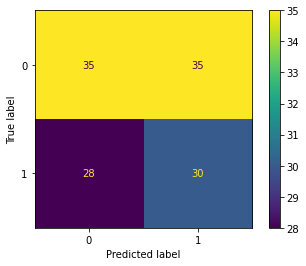

In [62]:
cm = confusion_matrix(y_subset, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [63]:
print(classification_report(y_subset, predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        70
           1       0.46      0.52      0.49        58

    accuracy                           0.51       128
   macro avg       0.51      0.51      0.51       128
weighted avg       0.51      0.51      0.51       128

